In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
import math

In [3]:
name = "gr"
plt.rcParams.update({'font.size': 22})

In [5]:
data = pd.read_csv(name + ".csv", names=["V", "B"])

In [20]:
X = data["V"].values
sigma_X = 0.8
Y = data["B"].values * data["B"].values / 1000000
sigma_Y = 0.7

In [21]:
A = np.vstack([X, np.ones(len(X))]).T
k, b = np.linalg.lstsq(A, Y, rcond=None)[0]
#sigma_k = math.sqrt((Y.std() - Y.mean()**2 ) / (X.std() - X.mean()**2 ) - b**2 ) / math.sqrt(len(X))
#eps_k = sigma_k / k
#sigma_b = sigma_k * math.sqrt(X.std() / X.mean() - X.mean()**2 )

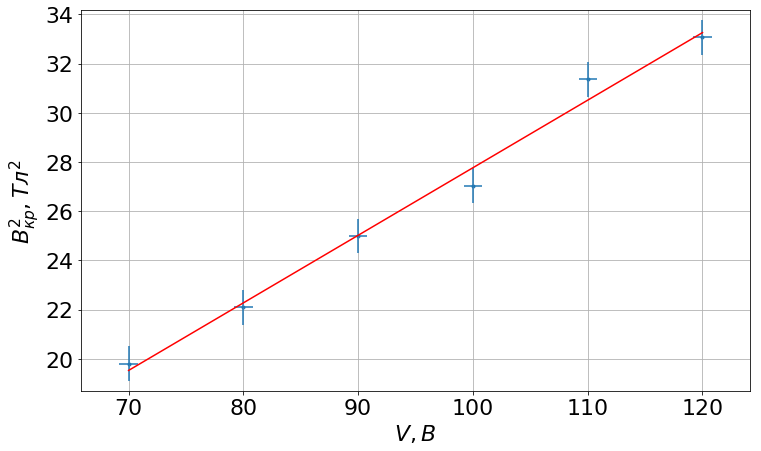

In [22]:
fig = plt.figure(figsize=(12, 7))
ax = fig.gca()
plt.scatter(X, Y, marker=".")
plt.errorbar(X, Y, xerr=sigma_X, yerr=sigma_Y, linestyle="None")
delta_x = (X.max() - X.min()) / len(X)
delta_y = (Y.max() - Y.min()) / len(Y)
ax.set_xlim(X.min() - delta_x/2, X.max() + delta_x/2)
ax.set_ylim((Y.min() - delta_y/2), Y.max() + delta_y/2)
plt.ylabel("$B_{кр}^2, {Тл}^2$")
plt.xlabel("$V, B$")
plt.plot(X, (k*X + b), 'r', label='Fitted line')
plt.grid(True)
plt.savefig("../" + name + ".png")

In [23]:
k

0.2747142857142861

In [8]:
b

-0.07581818181818151

In [7]:
data

,N,m,d
0,1,863,61
1,2,848,62
2,3,857,63
3,4,846,62
4,5,838,60
5,6,850,61
6,7,853,62
7,8,842,61
8,9,844,63
9,10,853,62


In [8]:
print(data.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &   N &    m &   d \\
\midrule
0  &   1 &  863 &  61 \\
1  &   2 &  848 &  62 \\
2  &   3 &  857 &  63 \\
3  &   4 &  846 &  62 \\
4  &   5 &  838 &  60 \\
5  &   6 &  850 &  61 \\
6  &   7 &  853 &  62 \\
7  &   8 &  842 &  61 \\
8  &   9 &  844 &  63 \\
9  &  10 &  853 &  62 \\
10 &  11 &  847 &  61 \\
11 &  12 &  848 &  60 \\
\bottomrule
\end{tabular}



In [10]:
data["d"].mean()

61.5